In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [3]:
pollution_df= pd.read_csv("/content/gadm2_aqli_1998_2021.csv")
pollution_df.head()

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
0,1,AFG,Afghanistan,Badakhshan,Baharak,95535.0,5,35.0,8.29,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AFG,Afghanistan,Badakhshan,Darwaz,27665.0,5,35.0,8.19,8.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AFG,Afghanistan,Badakhshan,Fayzabad,302299.0,5,35.0,7.83,8.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AFG,Afghanistan,Badakhshan,Ishkashim,18326.0,5,35.0,8.20,9.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,AFG,Afghanistan,Badakhshan,Jurm,94396.0,5,35.0,8.28,9.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
world_gdf = gpd.read_file('/content/aqli_gadm2_final_june302023.shp')


In [5]:
pollution_df.columns

Index(['objectid_gadm2', 'iso_alpha3', 'country', 'name_1', 'name_2',
       'population', 'whostandard', 'natstandard', 'pm1998', 'pm1999',
       'pm2000', 'pm2001', 'pm2002', 'pm2003', 'pm2004', 'pm2005', 'pm2006',
       'pm2007', 'pm2008', 'pm2009', 'pm2010', 'pm2011', 'pm2012', 'pm2013',
       'pm2014', 'pm2015', 'pm2016', 'pm2017', 'pm2018', 'pm2019', 'pm2020',
       'pm2021', 'llpp_who_1998', 'llpp_who_1999', 'llpp_who_2000',
       'llpp_who_2001', 'llpp_who_2002', 'llpp_who_2003', 'llpp_who_2004',
       'llpp_who_2005', 'llpp_who_2006', 'llpp_who_2007', 'llpp_who_2008',
       'llpp_who_2009', 'llpp_who_2010', 'llpp_who_2011', 'llpp_who_2012',
       'llpp_who_2013', 'llpp_who_2014', 'llpp_who_2015', 'llpp_who_2016',
       'llpp_who_2017', 'llpp_who_2018', 'llpp_who_2019', 'llpp_who_2020',
       'llpp_who_2021', 'llpp_nat_1998', 'llpp_nat_1999', 'llpp_nat_2000',
       'llpp_nat_2001', 'llpp_nat_2002', 'llpp_nat_2003', 'llpp_nat_2004',
       'llpp_nat_2005', 'llpp_nat_2

**# 1.1  Count the GADM2 regions in India**

In [5]:
india_gadm2_count = pollution_df[pollution_df['country'] == 'India']['name_2'].nunique()
print(f"Number of GADM2 regions in India: {india_gadm2_count}")

Number of GADM2 regions in India: 684


**# 1.2 Population-weighted pollution average at country (GADM0) level**

In [7]:
def weighted_avg(df):
    weighted_values = df.iloc[:, 8:].mul(df['population'], axis=0).sum() / df['population'].sum()
    weighted_values['country'] = df['country'].iloc[0]
    return weighted_values.reset_index()


country_pollution = pollution_df.groupby(['country']).apply(weighted_avg)


<ipython-input-7-7877c952a1e9>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_pollution = pollution_df.groupby(['country']).apply(weighted_avg)


In [15]:
country_pollution.head()

index          0
country                         
Afghanistan 0  pm1998  10.883377
            1  pm1999  10.695073
            2  pm2000  11.882054
            3  pm2001  13.894024
            4  pm2002  13.579107

In [47]:
#save to csv
country_pollution.to_csv('country_level_pollution.csv', index=False)

In [9]:
# 10 most polluted countries in 2021
pm2021_data = country_pollution[country_pollution['index'] == 'pm2021']
top_ten_values = pm2021_data.sort_values(by=0, ascending=False).head(10)
top_ten_values


,,index,0
country,,,
Bangladesh,23,pm2021,73.957984
India,23,pm2021,58.70153
Nepal,23,pm2021,51.713215
Pakistan,23,pm2021,44.732405
Mongolia,23,pm2021,36.039302
Myanmar,23,pm2021,34.979832
Democratic Republic of the Congo,23,pm2021,34.643665
Republic of the Congo,23,pm2021,32.409004
Rwanda,23,pm2021,32.356333


**# 1.3 Most polluted GADM2 region in 1998, 2005, 2021**

In [49]:
for year in [1998, 2005, 2021]:
    year_col = f'pm{year}'
    most_polluted_region = pollution_df.loc[pollution_df[year_col].idxmax(), ['name_2', 'country', year_col]]
    print(f"Most polluted GADM2 region in {year}: {most_polluted_region.values}")


Most polluted GADM2 region in 1998: ['Unnao' 'India' 78.55]
Most polluted GADM2 region in 2005: ['NCT of Delhi' 'India' 98.75]
Most polluted GADM2 region in 2021: ['NCT of Delhi' 'India' 126.51]


**# 1.4 Trendline plot for Uttar Pradesh (1998-2021)**

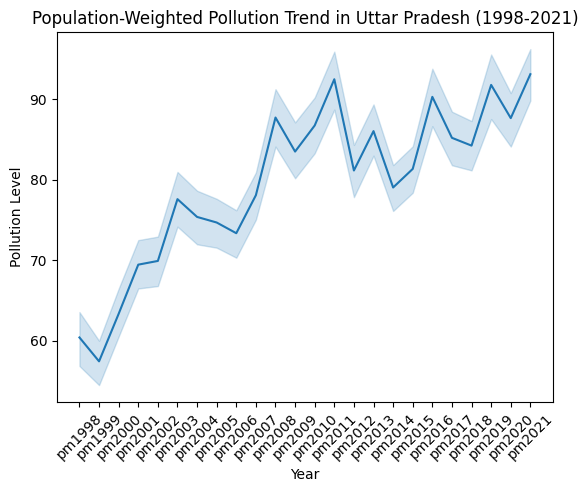

In [65]:
up_trend = pollution_df[(pollution_df['country'] == 'India') & (pollution_df['name_1'] == 'Uttar Pradesh')]
sns.lineplot(data=up_trend.melt(id_vars=['name_2'], value_vars=[f'pm{year}' for year in range(1998, 2022)]), x='variable', y='value')
plt.title("Population-Weighted Pollution Trend in Uttar Pradesh (1998-2021)")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.xticks(rotation=45)
plt.savefig('up_trend.png', dpi=300)
plt.show()

**# 2.1 Life Years Lost Analysis (Bar Graph & Map)**

In [1]:
pollution_df['LLP_WHO'] = pollution_df[[f'llpp_who_{year}' for year in range(1998, 2022)]].sum(axis=1)
top_10_lyl = pollution_df.groupby('country')['LLP_WHO'].sum().nlargest(10).reset_index()


NameError: name 'pollution_df' is not defined

<ipython-input-16-19114e8f26e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lyl, x='LLP_WHO', y='country', palette='Reds')


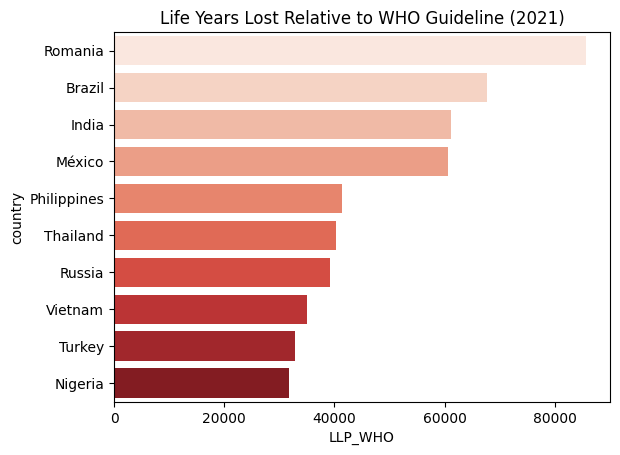

In [16]:
sns.barplot(data=top_10_lyl, x='LLP_WHO', y='country', palette='Reds')
plt.title("Life Years Lost Relative to WHO Guideline (2021)")
plt.savefig('lyl_bar.png', dpi=300)
plt.show()

In [17]:
# Ensure country names are consistent
top_10_countries = top_10_lyl['country'].unique()

# Filter world_gdf for only the top 10 polluted countries
filtered_gdf = world_gdf[world_gdf['name0'].isin(top_10_countries)][['name0', 'name1', 'name2', 'geometry']]



In [18]:
# Merge filtered_gdf (spatial data) with top_10_lyl (pollution data)
merged_gdf = filtered_gdf.merge(top_10_lyl, left_on='name0', right_on='country', how='left')

# Drop duplicate 'country' column after merging
merged_gdf.drop(columns=['country'], inplace=True)

In [19]:
merged_gdf

,name0,name1,name2,geometry,LLP_WHO
0,Brazil,Acre,Acrelândia,"MULTIPOLYGON (((-67.00087 -10.22907, -67.00163...",67651.00
1,Brazil,Acre,Assis Brasil,"POLYGON ((-69.57415 -10.94523, -69.57451 -10.9...",67651.00
2,Brazil,Acre,Brasiléia,"POLYGON ((-69.41283 -10.93708, -69.41289 -10.9...",67651.00
3,Brazil,Acre,Bujari,"POLYGON ((-67.97684 -9.35273, -67.97684 -9.352...",67651.00
4,Brazil,Acre,Capixaba,"MULTIPOLYGON (((-67.57861 -10.50274, -67.57927...",67651.00
...,...,...,...,...,...
19067,Vietnam,Yên Bái,Trấn Yên,"POLYGON ((104.89278 21.59124, 104.89629 21.587...",34956.92
19068,Vietnam,Yên Bái,Văn Chấn,"POLYGON ((104.87263 21.34886, 104.87083 21.352...",34956.92
19069,Vietnam,Yên Bái,Văn Yên,"POLYGON ((104.71706 21.73527, 104.71885 21.733...",34956.92
19070,Vietnam,Yên Bái,Yên Bái,"POLYGON ((104.87248 21.68115, 104.87209 21.680...",34956.92


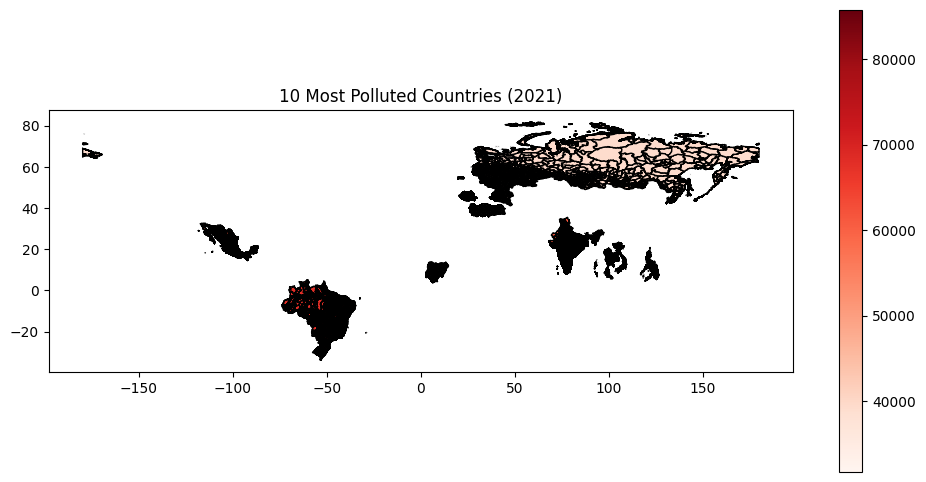

In [22]:

fig, ax = plt.subplots(figsize=(12, 6))
merged_gdf.plot(column='LLP_WHO', cmap='Reds', legend=True, edgecolor='black', ax=ax)
plt.title("10 Most Polluted Countries (2021)")
plt.savefig('lyl_map.png', dpi=300)
plt.show()


due to memory loading issues just viualized the polluted countries only rather visualizing the entire world map.


**# 2.2 Potential Gain in Life Expectancy Map (Eastern vs Western Europe)**

In [12]:
europe_gdf= world_gdf.copy()
polluted_europe= pollution_df.copy()

source= https://en.wikipedia.org/wiki/Eastern_Europe

source= https://en.wikipedia.org/wiki/Western_Europe

In [20]:
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]
western_countries = ["AUT", "BEL", "DNK", "FIN", "FRA", "DEU", "GRC", "ISL", "IRL", "ITA", "LUX", "MLT", "NLD", "NOR", "PRT", "ESP", "SWE", "CHE", "GBR"]

total_europe= eastern_countries + western_countries
len(total_europe)

39

In [21]:
polluted_europe = pollution_df[pollution_df['iso_alpha3'].isin(total_europe)][['country', 'iso_alpha3', 'LLP_WHO']]
polluted_europe['iso_alpha3'].nunique()

39

In [22]:
polluted_europe

,country,iso_alpha3,LLP_WHO
343,Albania,ALB,25.35
344,Albania,ALB,26.69
345,Albania,ALB,22.00
346,Albania,ALB,26.53
347,Albania,ALB,32.38
...,...,...,...
43024,United Kingdom,GBR,21.04
43025,United Kingdom,GBR,12.92
43026,United Kingdom,GBR,22.09
43027,United Kingdom,GBR,19.45


In [23]:
eastern_countries = ["POL", "HUN", "CZE", "SVK", "RUS", "UKR", "BLR", "ROU", "BGR", "MDA", "LTU", "LVA", "EST", "ALB", "MKD", "SRB", "MNE", "BIH", "HRV", "SVN"]
western_countries = ["AUT", "BEL", "DNK", "FIN", "FRA", "DEU", "GRC", "ISL", "IRL", "ITA", "LUX", "MLT", "NLD", "NOR", "PRT", "ESP", "SWE", "CHE", "GBR"]

total_europe = eastern_countries + western_countries

# Create a new DataFrame for pollution data filtered by selected European countries
polluted_europe = pollution_df[pollution_df['iso_alpha3'].isin(total_europe)][['country', 'iso_alpha3', 'LLP_WHO']]

# Filter only polluted European countries
europe_pollution_df = polluted_europe[polluted_europe['iso_alpha3'].isin(polluted_europe['iso_alpha3'].unique())]

# Filter European countries from world_gdf
europe_gdf = world_gdf[world_gdf['name0'].isin(europe_pollution_df['country'])]

# Merge pollution data with European shapefile
europe_gdf = europe_gdf.merge(europe_pollution_df, left_on='name0', right_on='country', how='left')

europe_gdf = europe_gdf[['obidgadm2', 'name0', 'name1', 'name2', 'geometry', 'iso_alpha3', 'LLP_WHO']]

# Assign region labels
europe_gdf['region'] = europe_gdf['iso_alpha3'].apply(lambda x: 'East' if x in eastern_countries else 'West')


grouped_europe_gdf = europe_gdf.groupby(['name0', 'name1', 'name2','iso_alpha3','region']).agg({'LLP_WHO': 'mean', 'geometry': 'first'}).reset_index()


In [48]:
grouped_europe_gdf

,name0,name1,name2,iso_alpha3,region,LLP_WHO,geometry
0,Albania,Berat,Beratit,ALB,East,26.212973,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,..."
1,Albania,Berat,Kuçovës,ALB,East,26.212973,"POLYGON ((19.96408 40.85664, 19.96338 40.85128..."
2,Albania,Berat,Skraparit,ALB,East,26.212973,"POLYGON ((20.36911 40.42555, 20.3705 40.41808,..."
3,Albania,Dibër,Bulqizës,ALB,East,26.212973,"POLYGON ((20.54619 41.42509, 20.54888 41.42147..."
4,Albania,Dibër,Dibrës,ALB,East,26.212973,"POLYGON ((20.42978 41.5569, 20.42501 41.56383,..."
...,...,...,...,...,...,...,...
11327,United Kingdom,Wales,"Rhondda, Cynon, Taff",GBR,West,10.662022,"POLYGON ((-3.57142 51.68555, -3.57222 51.69083..."
11328,United Kingdom,Wales,Swansea,GBR,West,10.662022,"MULTIPOLYGON (((-4.32417 51.56625, -4.32417 51..."
11329,United Kingdom,Wales,Torfaen,GBR,West,10.662022,"POLYGON ((-3.13107 51.70694, -3.13223 51.71112..."
11330,United Kingdom,Wales,Vale of Glamorgan,GBR,West,10.662022,"MULTIPOLYGON (((-3.10472 51.34153, -3.10472 51..."


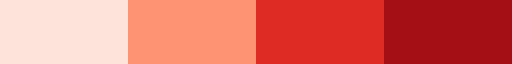

In [17]:
# Define color scale based on AQLI legend
colors = ["#FEE5D9", "#FC9272", "#DE2D26", "#A50F15"]
cmap = ListedColormap(colors)
cmap

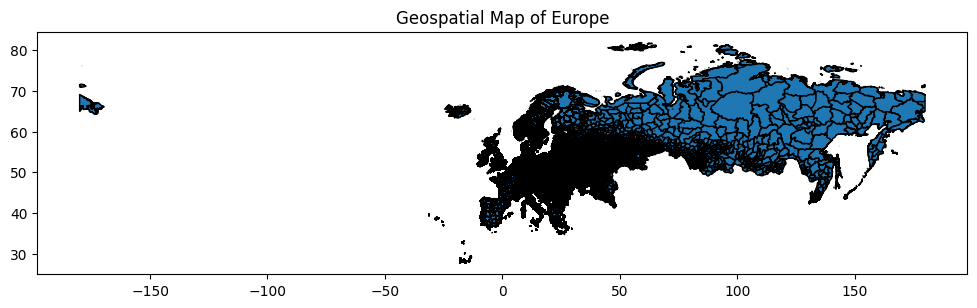

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
europe_gdf.plot(ax=ax, edgecolor='black')
plt.title("Geospatial Map of Europe")
plt.show()


Group by name0 and name1 with average of LLP_WHO   as rows were going to Millions due to minimum change in LLP_WHO wrt reegion and thus computationally expensive for me.

In [19]:
world_gd

,obidgadm2,name0,name1,name2,geometry
0,1,Afghanistan,Badakhshan,Baharak,"POLYGON ((71.41149 36.55717, 71.40954 36.55237..."
1,2,Afghanistan,Badakhshan,Darwaz,"POLYGON ((71.2762 38.00465, 71.27578 38.00471,..."
2,3,Afghanistan,Badakhshan,Fayzabad,"POLYGON ((70.78272 37.27678, 70.78635 37.27388..."
3,4,Afghanistan,Badakhshan,Ishkashim,"POLYGON ((71.41149 36.55717, 71.40091 36.56163..."
4,5,Afghanistan,Badakhshan,Jurm,"POLYGON ((70.71236 37.07621, 70.73582 37.06548..."
...,...,...,...,...,...
48150,48208,Zimbabwe,Midlands,Redcliff,"POLYGON ((29.69907 -19.00888, 29.71847 -19.004..."
48151,48209,Zimbabwe,Midlands,Shurugwi,"POLYGON ((29.8756 -20.0057, 29.87369 -20.00481..."
48152,48210,Zimbabwe,Midlands,Shurugwi Town,"POLYGON ((30.05583 -19.69895, 30.05583 -19.699..."
48153,48211,Zimbabwe,Midlands,Zvishavane,"POLYGON ((30.37508 -20.44078, 30.37532 -20.440..."


In [ ]:
sample_gdf= world_gdf.merge(pollution_df, left_on='name0', right_on='country', how='left').

In [53]:
europe_gdf

,obidgadm2,name0,name1,name2,geometry,iso_alpha3,LLP_WHO,region
0,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",ALB,25.35,East
1,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",ALB,26.69,East
2,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",ALB,22.00,East
3,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",ALB,26.53,East
4,344,Albania,Berat,Beratit,"POLYGON ((20.10237 40.7677, 20.10673 40.76396,...",ALB,32.38,East
...,...,...,...,...,...,...,...,...
16516813,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",GBR,21.04,West
16516814,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",GBR,12.92,West
16516815,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",GBR,22.09,West
16516816,43084,United Kingdom,Wales,Wrexham,"POLYGON ((-3.14059 53.08431, -3.11451 53.10301...",GBR,19.45,West


In [54]:
europe_gdf['region'].value_counts()

,count
region,
East,15721946
West,794872


KeyboardInterrupt: 

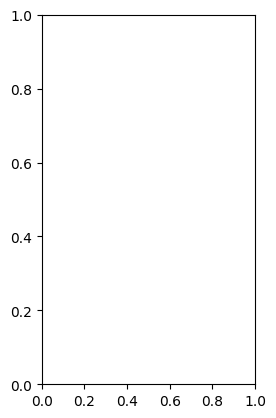

In [55]:
europe_gdf.plot(columns= 'LLP_WHO')

**# 2.3 Global Pollution Map (AQLI Colors)**

In [ ]:
aqli_colors = 'coolwarm'  # Replace with exact colors from AQLI site
fig, ax = plt.subplots(figsize=(12, 6))
world_gdf.plot(column='pm2021', cmap=aqli_colors, legend=True, edgecolor='black', ax=ax)
plt.title("Global Air Pollution Map (2021)")
plt.savefig('global_pollution.svg', dpi=320)
plt.show()


In [7]:
pollution_df

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
0,1,AFG,Afghanistan,Badakhshan,Baharak,95535.0,5,35.0,8.29,9.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AFG,Afghanistan,Badakhshan,Darwaz,27665.0,5,35.0,8.19,8.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AFG,Afghanistan,Badakhshan,Fayzabad,302299.0,5,35.0,7.83,8.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AFG,Afghanistan,Badakhshan,Ishkashim,18326.0,5,35.0,8.20,9.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,AFG,Afghanistan,Badakhshan,Jurm,94396.0,5,35.0,8.28,9.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48150,48208,ZWE,Zimbabwe,Midlands,Redcliff,40794.0,5,NaN,15.34,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48151,48209,ZWE,Zimbabwe,Midlands,Shurugwi,88020.0,5,NaN,16.30,14.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48152,48210,ZWE,Zimbabwe,Midlands,Shurugwi Town,24930.0,5,NaN,15.00,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48153,48211,ZWE,Zimbabwe,Midlands,Zvishavane,82142.0,5,NaN,15.54,12.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

# Define AQLI color bins based on PM2.5 levels (Modify based on AQLI)
aqli_colors = {
    (0, 5): '#e0feff',
    (5, 10): '#b7ebf1',
    (10, 20): '#8fd8e4',
    (20, 30): '#66c4d6',
    (30, 40): '#3db1c8',
    (40, 50): '#3f8dac' ,
    (50,60):  "#416891",
    (60,70): "#434475",
    (70,10000): "#451f59"
}

# Assign colors based on pollution levels
def get_aqli_color(value):
    for (low, high), color in aqli_colors.items():
        if low <= value < high:
            return color
    return 'gray'  # Default for missing values


In [ ]:
# Define AQLI color bins based on PM2.5 levels (Modify based on AQLI)
aqli_colors = {
    (0, 5): '#e0feff',
    (5, 10): '#b7ebf1',
    (10, 20): '#8fd8e4',
    (20, 30): '#66c4d6',
    (30, 40): '#3db1c8',
    (40, 50): '#3f8dac',
    (50, 60): "#416891",
    (60, 70): "#434475",
    (70, 10000): "#451f59"
}

# Assign colors based on pollution levels
def get_aqli_color(value):
    for (low, high), color in aqli_colors.items():
        if low <= value < high:
            return color
    return 'gray'  # Default for missing values

# Ensure 'pm2021' column exists in world_gdf
if 'pm2021' not in world_gdf.columns:
    world_gdf = world_gdf.merge(pollution_df[['country', 'pm2021']], left_on='name0', right_on='country', how='left')

# Apply the color function to the 'pm2021' column of world_gdf
world_gdf['color'] = world_gdf['pm2021'].apply(get_aqli_color)

# Plot the pollution map
fig, ax = plt.subplots(figsize=(14, 8))
world_gdf.plot(ax=ax, color=world_gdf['color'], edgecolor='black')  # Use world_gdf['color']

# Customize plot
plt.title("Global Air Pollution Levels (2021) - AQLI Colors")
plt.axis('off')

# Save as high-quality SVG
plt.savefig("global_pollution_map.svg", format='svg', dpi=320)
plt.show()

In [16]:
eu_gdf['color'] = eu_gdf['pm2021'].apply(lambda x: get_aqli_color(x) if pd.notnull(x) else 'gray')


IndexError: indices are out-of-bounds

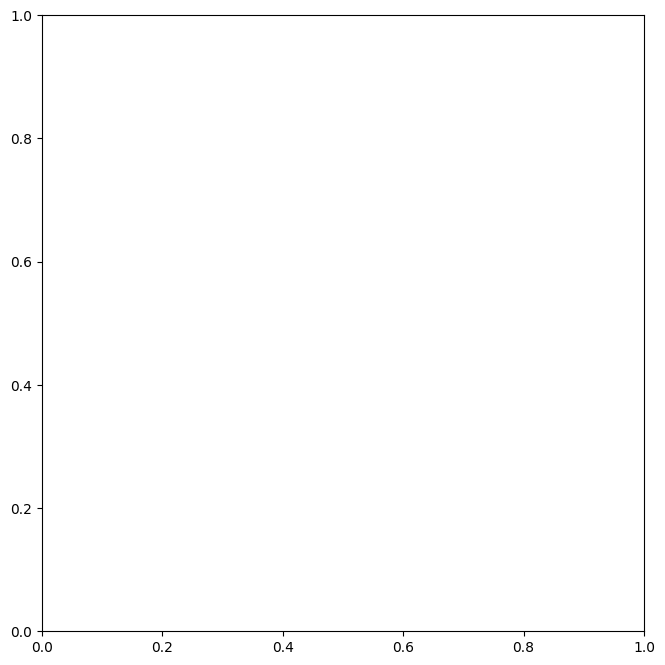

In [18]:

# Plot the pollution map
fig, ax = plt.subplots(figsize=(14, 8))
world_gdf.plot(ax=ax, color=eu_gdf['color'], edgecolor='black')

# Customize plot
plt.title("Global Air Pollution Levels (2021) - AQLI Colors")
plt.axis('off')

# Save as high-quality SVG
plt.savefig("global_pollution_map.svg", format='svg', dpi=320)
plt.show()

In [8]:
europe_gdf = gpd.read_file('/content/Europe_merged.shp')

In [13]:
eu_gdf= europe_gdf.merge(pollution_df, left_on='COUNTRY', right_on='country', how='left')

In [14]:
eu_gdf

,GID_0,COUNTRY,geometry,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
0,ALB,Albania,"MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...",344.0,ALB,Albania,Berat,Beratit,104216.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ALB,Albania,"MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...",345.0,ALB,Albania,Berat,Kuçovës,28089.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ALB,Albania,"MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...",346.0,ALB,Albania,Berat,Skraparit,19015.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ALB,Albania,"MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...",347.0,ALB,Albania,Dibër,Bulqizës,32077.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,"MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...",348.0,ALB,Albania,Dibër,Dibrës,67424.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,MNE,Montenegro,None,25496.0,MNE,Montenegro,Rožaje,NaN,19641.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9588,MNE,Montenegro,None,25497.0,MNE,Montenegro,Šavnik,NaN,1497.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9589,MNE,Montenegro,None,25498.0,MNE,Montenegro,Tivat,NaN,12887.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9590,MNE,Montenegro,None,25499.0,MNE,Montenegro,Ulcinj,NaN,21772.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
